## Cartesian 3D Field Example

In [1]:
from impact import Impact
import os

# plotting modules
from impact.plotting import layout_plot
from bokeh.plotting import output_notebook
from bokeh.plotting import show
output_notebook(hide_banner=True)
%config InlineBackend.figure_format = 'retina'

In [2]:
# Make Impact object
ifile = '../templates/3dfield/ImpactT.in'
I = Impact(ifile)
#I.numprocs = 8
I.header['Bcurr'] = 0 # turn off space charge for speed

In [3]:
# Show a MAD-style printout of each element in the lattice
I.print_lattice()

SC_2D_to_3D: rotationally_symmetric_to_3d, description=name:SC_2D_to_3D, s=-0.1
!steering
!0.0 1 1 -1 0.10 1.0 0.10 0.000 0.0 0.000 0.0 /
!3D rf field
rf_field: emfield_cartesian, description=name:rf_field, L=0.0866528, zedge=0.0,
      rf_field_scale=-111.11, rf_frequency=11424000000.0, theta0_deg=292.0,
      filename=1T1.T7, radius=0.002, s=0.0866528
!solenoid field
sol: solrf, description=name:sol, L=0.2, zedge=0.0, rf_field_scale=0.0, rf_frequency=0.0,
      theta0_deg=0.0, filename=rfdata102, radius=0.01, x_offset=0.0, y_offset=0.0,
      x_rotation=0.0, y_rotation=0.0, z_rotation=0.0, solenoid_field_scale=0.5658,
      s=0.2
!change time step size
change_dt: change_timestep, description=name:change_dt, dt=5e-13, s=0.2
drift_1: drift, description=, L=0.34, zedge=0.2, radius=0.15, s=0.54
!terminate the simulation
!0.0 1 1 -99 0.55 1.0 0.55 /



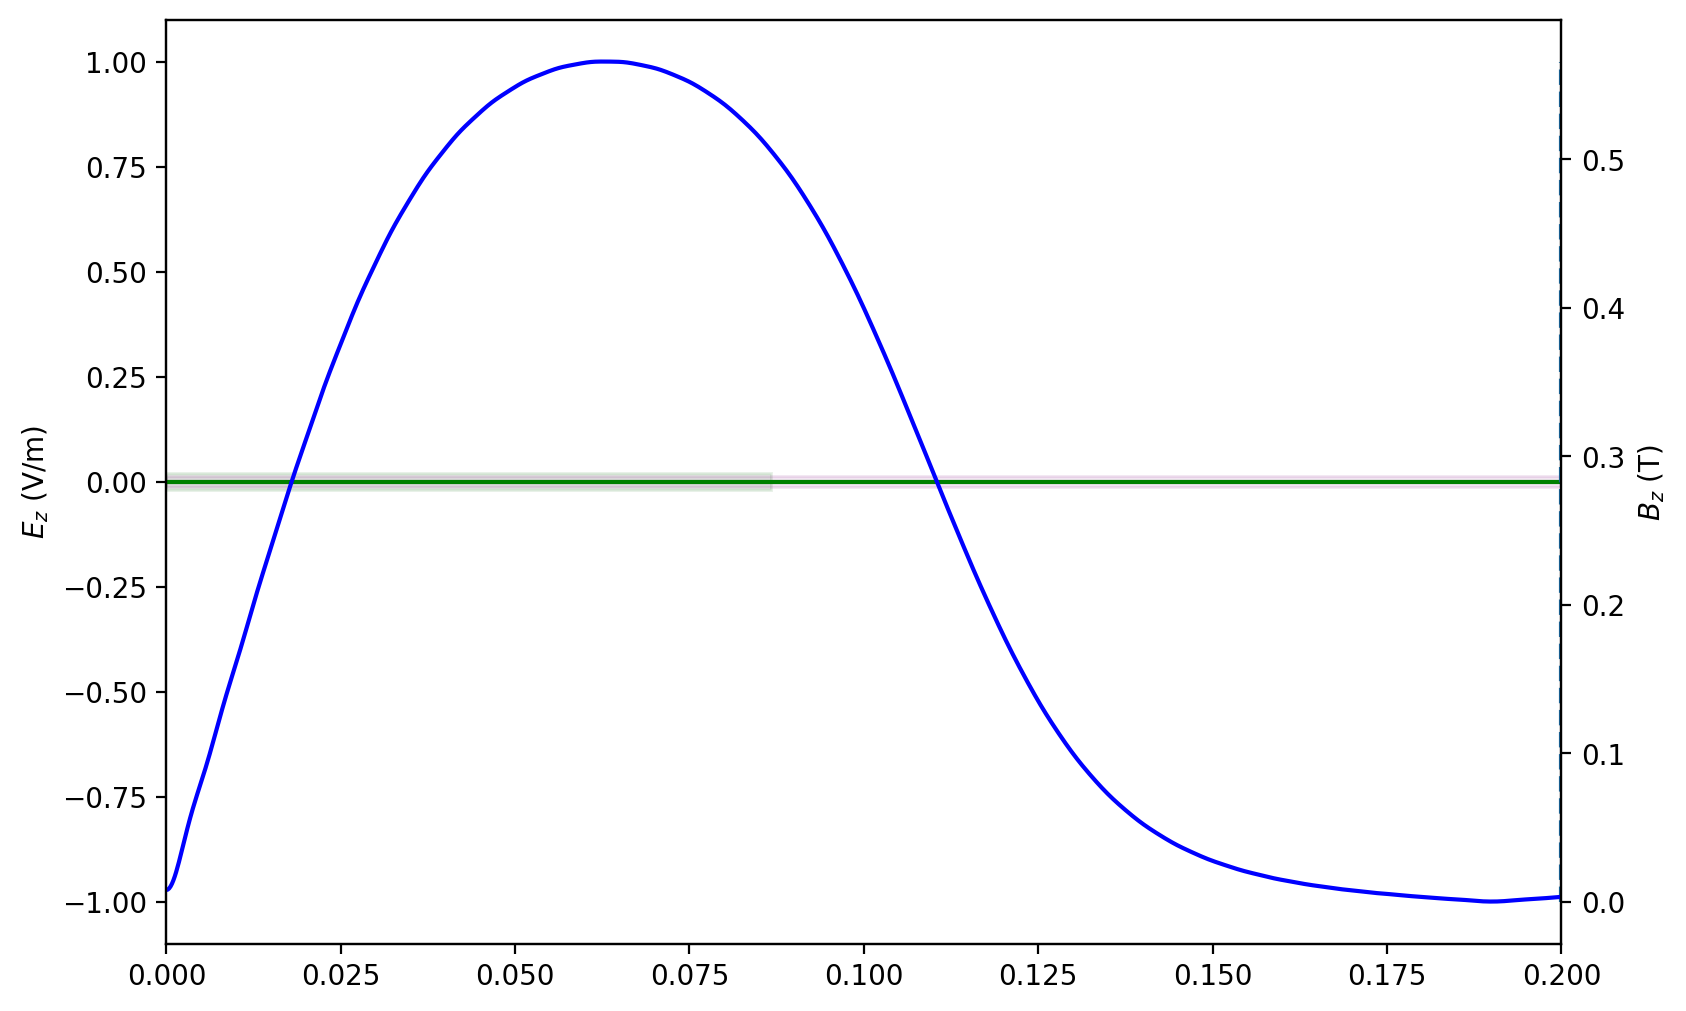

In [4]:
# Note that emfield_cartesian plotting is not yet implemented!
I.plot(figsize=(9,6))

In [5]:
layout = layout_plot(I.input['lattice'], height=300, width=600)
show(layout)

In [6]:
%%time
I.run()

CPU times: user 51.3 ms, sys: 36.5 ms, total: 87.8 ms
Wall time: 28.7 s


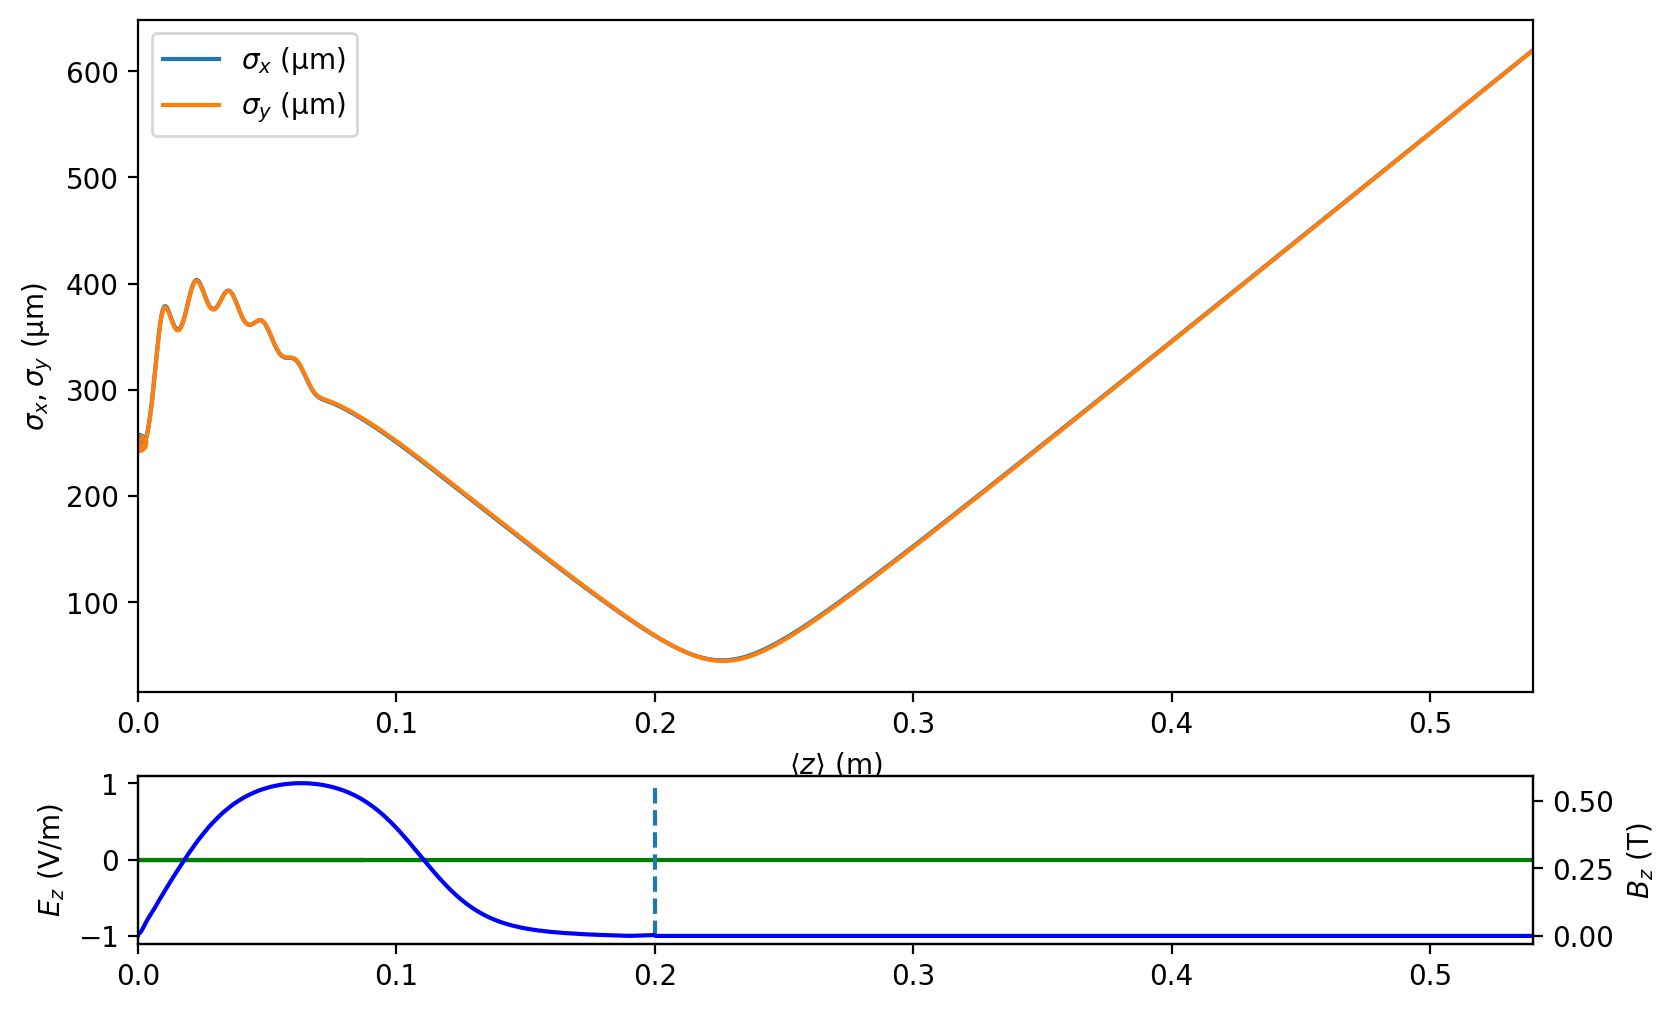

In [7]:
I.plot(figsize=(9,6))

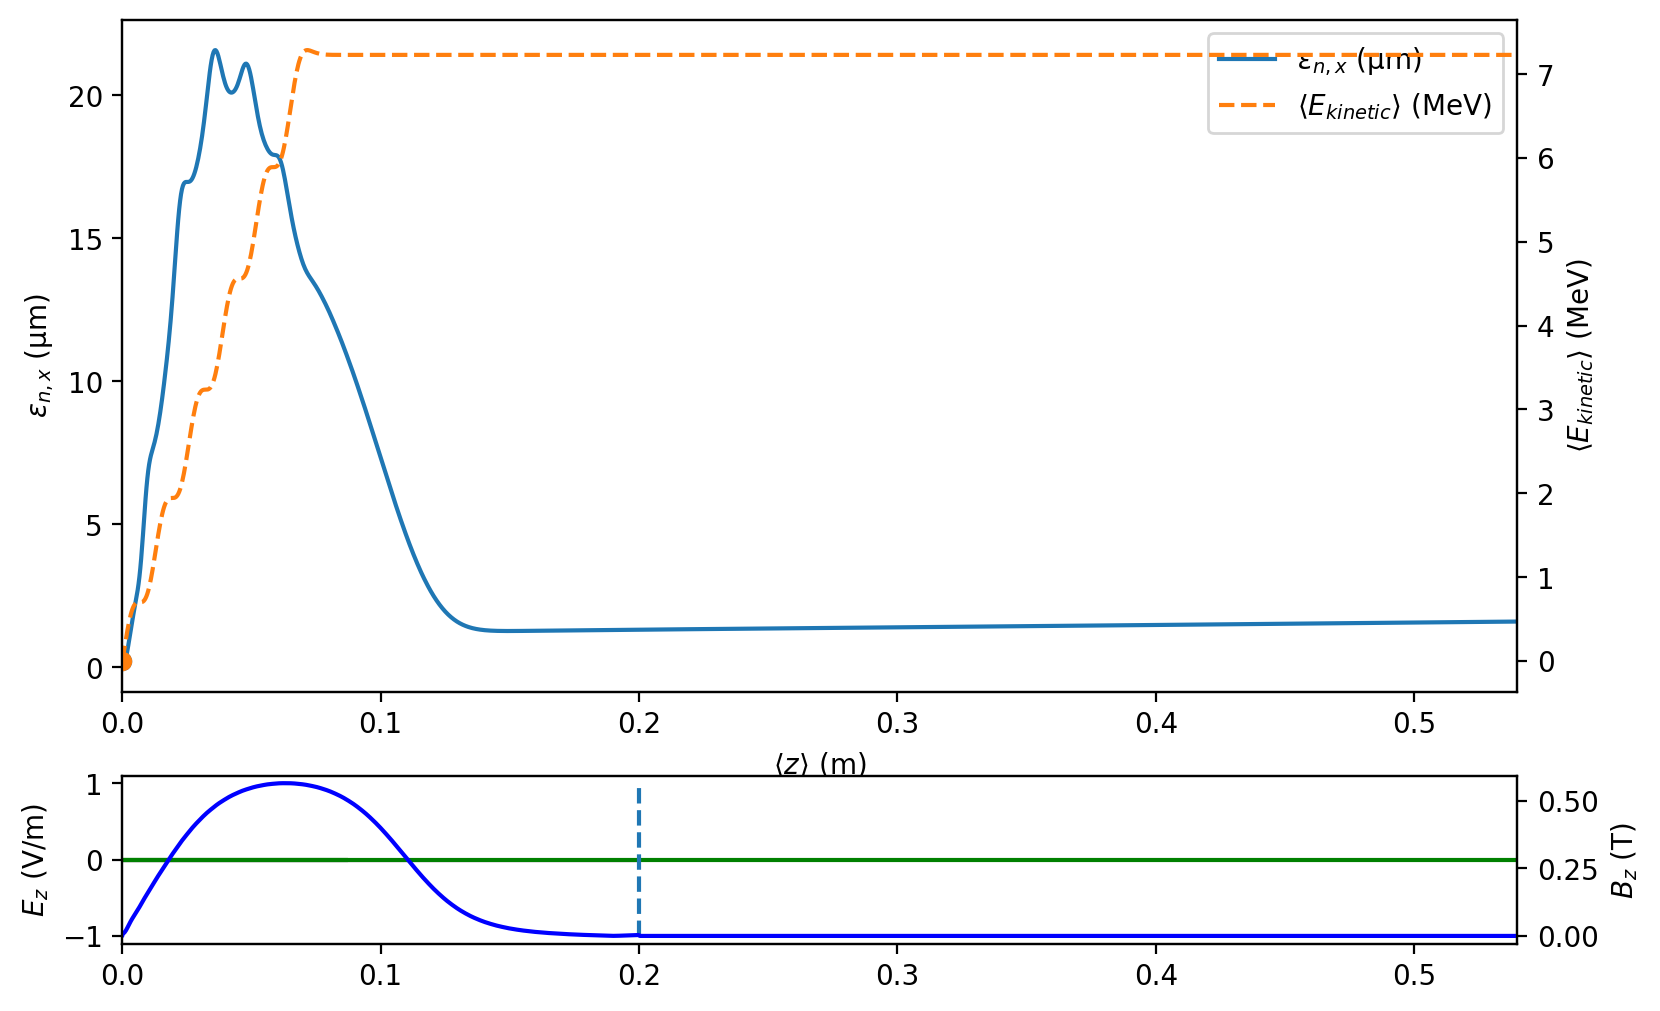

In [8]:
I.plot('norm_emit_x', y2='mean_kinetic_energy', figsize=(9,6))

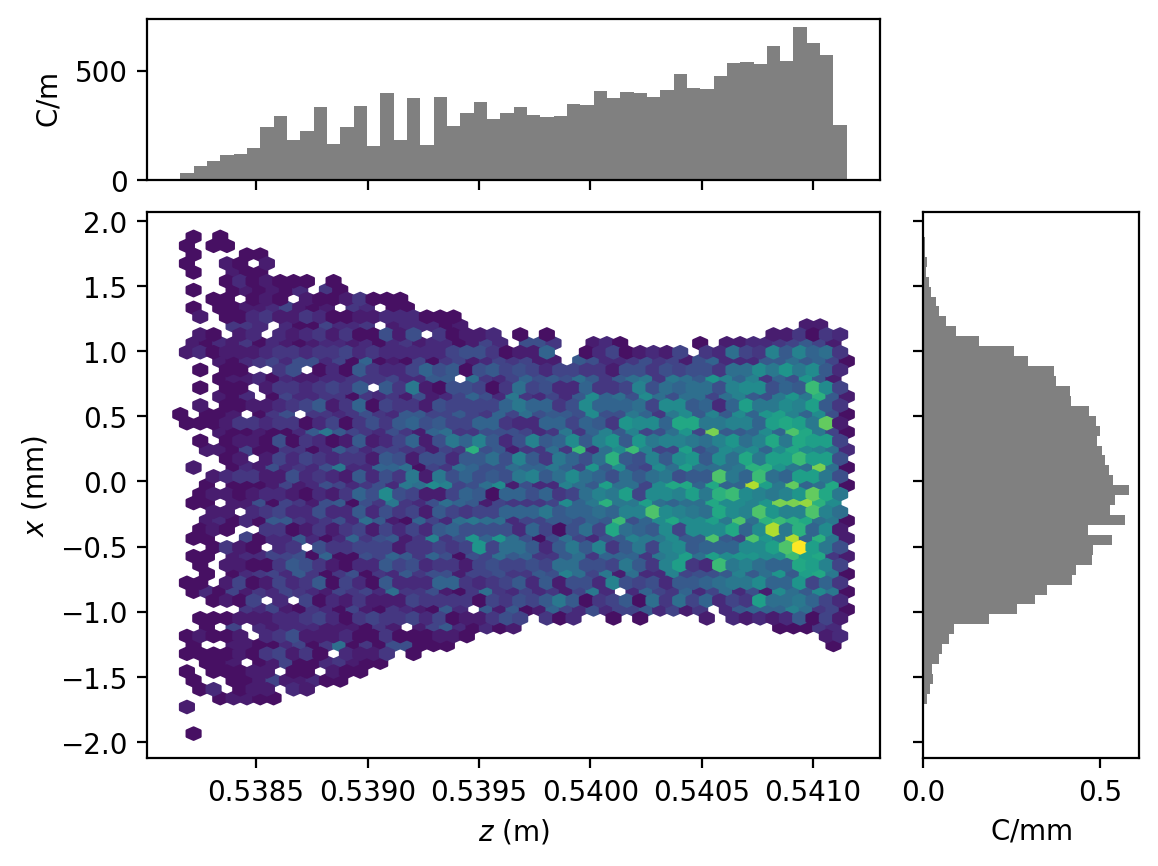

In [9]:
I.particles['final_particles'].plot('z', 'x')

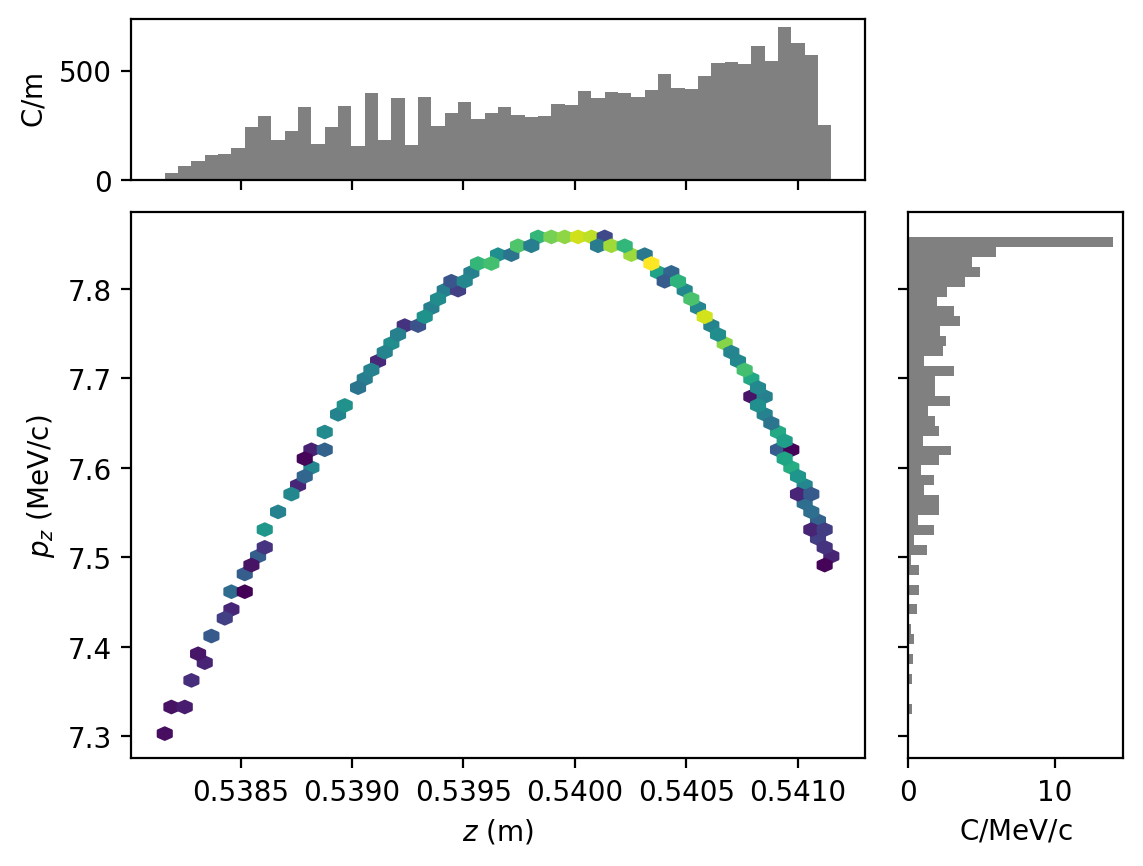

In [10]:
I.particles['final_particles'].plot('z', 'pz')